In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ushape.csv')

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0
1,2.1151,-0.0462,1
2,0.8825,-0.0758,0
3,-0.0551,-0.0373,1
4,0.8295,-0.5393,1


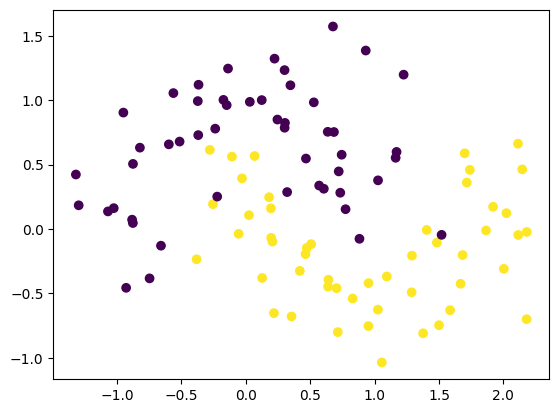

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.01992537,  1.6374745 , -0.96022606, -0.6855436 , -2.0359473 ,
          0.08277847, -0.84611356,  1.198132  , -0.8054857 , -0.1103655 ],
        [-0.7138774 , -0.10189575, -0.88877594, -1.7894732 ,  1.6875727 ,
          1.041565  , -1.0152102 ,  1.4402612 , -1.8330009 , -1.0250417 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.13593674,  0.44730547, -0.00520064, -0.63956517, -0.34323597,
         -0.37553394,  0.0135902 , -0.06935942, -0.07903292,  0.43555126],
        [ 0.23969685,  0.4712066 , -0.29723307,  0.17740497, -0.41077846,
          0.21709953,  0.02929886, -0.30756712, -0.21321411,  0.03360954],
        [-0.53419775,  0.74519664, -0.19214638, -0.23244007, -0.19192202,
         -0.5765914 , -0.06130598, -0.18682523,  0.7916315 ,  0.4338863 ],
        [-0.15451409, -0.11031899,  0.7284173 ,  0.15129079,  0.6814947 ,
          0.19304998, -0.7905115 ,  0.27787352, -0.61505336, -0.3616381 ],
        [-0.52911

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.10495991, -0.9430531 ,  0.66086626, -0.1044763 , -1.4102751 ,
         -1.0325493 , -0.3701135 , -0.14735714, -0.29265913,  0.68155   ],
        [-0.39484143,  0.6323521 , -0.0801958 ,  0.562686  ,  0.1691996 ,
          0.04436013,  0.68755996, -0.61969763,  0.3523873 ,  0.7220163 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.4147778 , -0.53531283,  0.3731053 , -0.06618731, -0.09909667,
          0.35247433,  0.60976315, -0.3289795 ,  0.15179542, -0.35985112],
        [ 0.18373363, -0.2031072 , -0.0133991 , -0.24529618, -0.04980256,
          0.17567453,  0.5361793 , -0.5525918 ,  0.18398784, -0.04601664],
        [-0.22751129,  0.2932353 , -0.3537831 , -0.09127408, -0.39878124,
         -0.4628535 ,  0.5377644 ,  0.25280616,  0.42448243, -0.30095333],
        [ 0.05010179, -0.16859545, -0.14138587, -0.41355062, -0.03724803,
          0.32960474,  0.16182718,  0.30505887,  0.10764834,  0.79650205],
        [-0.57360

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.4961 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4875 - loss: 0.6840 - val_accuracy: 0.5000 - val_loss: 0.6778
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4758 - loss: 0.6823 - val_accuracy: 0.5000 - val_loss: 0.6684
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5219 - loss: 0.6740 - val_accuracy: 0.5500 - val_loss: 0.6598
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5508 - loss: 0.6722 - val_accuracy: 0.7500 - val_loss: 0.6522
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6406 - loss: 0.6608 - val_accuracy: 0.8000 - val_loss: 0.6451
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6195 - loss: 0.6552 - val_accuracy: 0.8500 - val_loss: 0.6383
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6398 - loss: 0.6549 - val_accuracy: 0.8500 - val_loss

In [ ]:
model.get_weights()

[array([[ 0.05424146, -0.9347913 ,  0.78723246, -0.19755039, -1.37522   ,
         -1.2136227 , -0.24361324, -0.07653646, -0.2365296 ,  0.8516041 ],
        [-0.5776069 ,  0.6590166 , -0.2917544 ,  0.5093206 ,  0.16808054,
          0.02346471,  0.883054  , -0.6499458 ,  0.29406404,  0.7716595 ]],
       dtype=float32),
 array([ 0.18424077, -0.03908167,  0.07753535, -0.1055716 , -0.1175715 ,
        -0.08356907,  0.10727814,  0.02689414, -0.06398686,  0.1609556 ],
       dtype=float32),
 array([[-3.2627341e-01, -6.6002870e-01,  4.0806571e-01, -1.3300039e-01,
         -9.9096671e-02,  4.7270373e-01,  8.7416255e-01, -9.4330177e-02,
          4.0517020e-01, -1.4689782e-01],
        [ 2.9888031e-01, -6.2980726e-02,  2.5199488e-02, -9.5826693e-02,
         -4.9802560e-02,  2.4828298e-01,  5.1324856e-01, -6.1300564e-01,
          1.5743367e-01, -2.2003222e-02],
        [-2.2251230e-01,  2.1601436e-01, -4.2633668e-01, -1.4379999e-01,
         -3.9878124e-01, -2.0651303e-01,  7.1321237e-01,  3

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

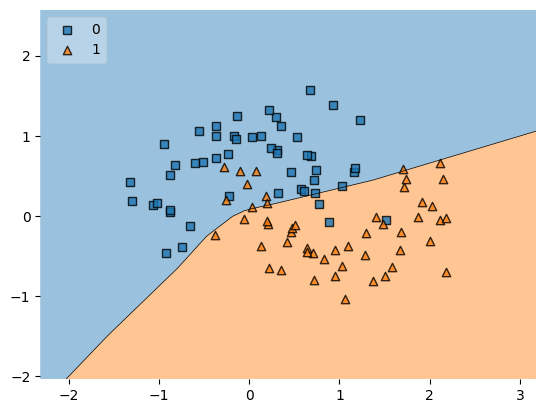

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.030587111758314172)

In [ ]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.026714373725916195)